Dataset shape: (920, 16)

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Target distribution (counts):
target_bin
1    509
0    411
Name: count, dtype: int64

Target distribution (normalized):
target_bin
1    0.553261
0    0.446739
Name: proportion, dtype: float64


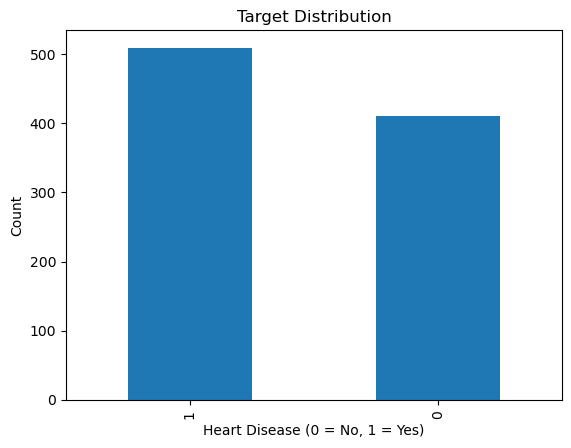

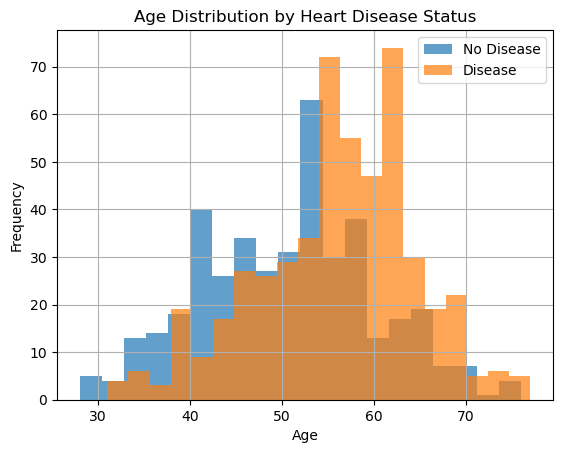


Best max_depth: 4
Best F1-score: 0.8899


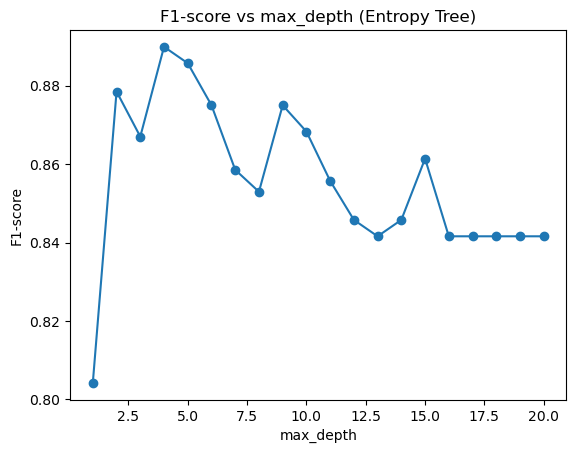


Final Evaluation Metrics:
Accuracy: 0.8696
F1-score: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        82
           1       0.84      0.95      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.86       184
weighted avg       0.88      0.87      0.87       184



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

df = pd.read_csv("heart_disease_uci.csv")

print("Dataset shape:", df.shape)

print("\nMissing values per column:")
print(df.isnull().sum())

if "target" in df.columns:
    df["target_bin"] = df["target"]
elif "num" in df.columns:
    df["target_bin"] = (df["num"] > 0).astype(int)
else:
    raise ValueError("Target column not found")

# Target distribution
print("\nTarget distribution (counts):")
print(df["target_bin"].value_counts())

print("\nTarget distribution (normalized):")
print(df["target_bin"].value_counts(normalize=True))

plt.figure()
df["target_bin"].value_counts().plot(kind="bar")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()

# Plot : Age vs Heart Disease
plt.figure()
df[df["target_bin"] == 0]["age"].hist(bins=20, alpha=0.7)
df[df["target_bin"] == 1]["age"].hist(bins=20, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Heart Disease Status")
plt.legend(["No Disease", "Disease"])
plt.show()


X = df.drop(columns=["target_bin", "num"], errors="ignore")
y = df["target_bin"]

X = X.replace("?", np.nan)

categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X[numerical_cols] = X[numerical_cols].apply(pd.to_numeric)

X = X.fillna(X.median())

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


depths = range(1, 21)
f1_scores = []

for depth in depths:
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    f1_scores.append(f1_score(y_valid, y_pred))

best_depth = depths[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print("\nBest max_depth:", best_depth)
print("Best F1-score:", round(best_f1, 4))

# Plot: F1 vs max_depth
plt.figure()
plt.plot(depths, f1_scores, marker="o")
plt.xlabel("max_depth")
plt.ylabel("F1-score")
plt.title("F1-score vs max_depth (Entropy Tree)")
plt.show()


final_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_depth,
    random_state=42
)

final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_valid)


acc = accuracy_score(y_valid, final_pred)
f1 = f1_score(y_valid, final_pred)

print("\nFinal Evaluation Metrics:")
print("Accuracy:", round(acc, 4))
print("F1-score:", round(f1, 4))

print("\nClassification Report:")
print(classification_report(y_valid, final_pred))


In [7]:
print(X.columns)

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num',
       'sex_Male', 'dataset_Hungary', 'dataset_Switzerland',
       'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'fbs_True', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_True', 'slope_flat',
       'slope_upsloping', 'thal_normal', 'thal_reversable defect'],
      dtype='object')
